# Introduction to Regression

### Data Science 350
### Stephen F Elston and Nick McClure

## Introduction

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression models attempt to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explainatory variables** or **features**. Single regression has one label used to predict one feature. Multiple regression uses two of more feature variables. 

Virtually all machine learning models, including some of the latest deep learning methods, are a form of regression. There methods often suffer from the same problems, including overfitting and mathematically unstable fitting methods. 

Linear regression is the foundational form of regression. In linear regression the squared error of the predictions of the dependent variable using the independent variable. This approach is know as the **method of least squares**.

## History

Regression is based on the method of least squares or the method of minimum mean square error. The ideas around least squares or averaging errors have occured over nearly three centruies. The fist known publication of a 'method of avergages' was by the German astronomer Tobias Mayer in 1750. Lapace used a similar method which he published in 1788.

<img src="img/TobiasMayer.jpg" alt="TobiasMayer" style="width: 200px;"/>

The first publication of the method or least squares was by the French mathematician Adrien-Marie Legendre in 1805. 

![](img/Legendre.jpg)
<center>**Caricature of Legendre**, published method of least squares</center>

It is very likely that the German physicist and mathematician Gauss developed the method of least squares as early as 1795, but did not publish the method until 1809, aside from a reference in a letter in 1799. Gauss never disputed Legendre's priority in publication. Legendre did not return the favor, and opposed any notion that Gauss had used the method earlier. 

![](img/Carl_Friedrich_Gauss.jpg)
<center>**Carl Friedrich Gauss**, early adoptor of least squares</center>

The first use of the term **regression** was by Francis Gaulton, a cousin of Charles Darwin, in 1886. Gaulton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. 

<center>![](img/Francis_Galton.jpg)
**Francis Galton**, inventor of regression</center>

While Gaulton invented a modern form regression, it fell to Karl Pearson to put regression and multiple regression on a firm mathematical footing. Pearson's 1898 publication proposed a method of regression as we understand it today. 

Many others have expanded the theory of regression in the 120 years since Pearson's paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times the interest in machine learning has lead to a rapid increase in the numbers and types of regression models. 

## Introduction to Linear Regression

We will focus here on **linear models** which are foundational
- Derived with linear algebra
- Basis of many machine learning models
- Understanding linear models is basis for understanding behavior ofmany statistical and ML models
- Basis of time series models

### Linear model of a strait line

Let's have a look at the simplest case of a regression model for a straght line. If we have one feature and one label, there are some number of values pairs, ${x_i,y_i}$, we can define a line that best fits that data.  

<img src="img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

$$where\\
slope = m = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y = b\ at\ x = 0$$


If we have a number of values pairs, ${x_i,y_i}$, we can write the equation for the line with the errors as:

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = error$$

We can visualize these errors as shown in the fiture below.

<img src="img/LSRegression.jpg" alt="LSRegression" style="width: 450px;"/>
<center>**Example of Least Squares Regression**</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least sqares regression**.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

There are lots of compuationally efficient algorithms for finding minimums of equations. img/TobiasMayer.jpg

### A first regresson model

Let's give regression a try. The code in the cell below computes data pairs along a straight line. Normally distributed noise is added to the data values. Run this code and examine the head of the data frame.

In [1]:
import numpy as np
import pandas as pd

# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 1

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
sim_data = pd.DataFrame({'x':x_data, 'y':y_data})
# Or alternatively:
# sim_data = pd.DataFrame(data=np.column_stack((x_data, y_data)), columns=['x','y'])

sim_data.head()

,x,y
0,0.000000,0.081076
1,0.204082,-1.589542
2,0.408163,1.278598
3,0.612245,-0.757524
4,0.816327,1.601651


Next, you can visualize these data by exectuting the code in the cell below. Notice that the points nearly fall on a stright line.

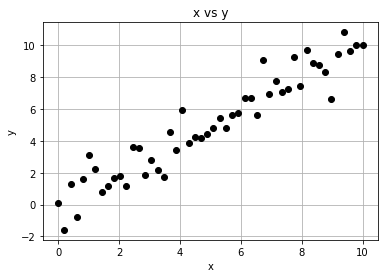

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# Matplotlib may give some font errors when loading for the first time, you can ignore these
plt.plot(sim_data['x'], sim_data['y'], 'ko')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

Now, you are ready to build and evaluate the model using Python. Python has libraries that contain linear modeling capabilities.  We will use the library 'Scikit-learn'. Model creation in Scikit-learn generally has two steps, declaring the model formulation and then fitting the model

In our case we only have one independent variable and one dependent variable. The code in the cell below does the following:  

- Compute the Python model object, `linear_model`, using the simple linear regression.
- Use the model object to compute scores (predicted values) for the dependent variable `y`. In this case, we just use the data that was orriginally used to compute the model. In a more general case, you can use other data to make predictions from the model.
- The residuals of the model are computed.

Execute this code and examine the head of the data frame computed.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


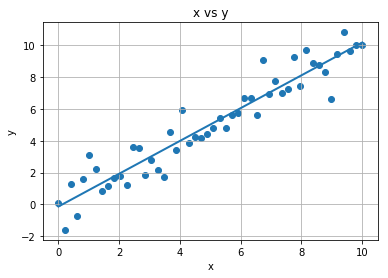

In [3]:
from sklearn import linear_model

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data (If you get a runtime/computing warning, you most likely can just ignore and rerun)
x_input = sim_data['x'].reshape(n_points, 1)
y_output = sim_data['y'].reshape(n_points, 1)
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

In [4]:
# Add predicted to pandas dataframe
sim_data['predicted'] = y_pred
# Add residuals to pandas dataframe
sim_data['resids'] = y_output - y_pred

# View head of data frame
sim_data.head()

,x,y,predicted,resids
0,0.000000,0.081076,-0.132854,0.213930
1,0.204082,-1.589542,0.077558,-1.667100
2,0.408163,1.278598,0.287970,0.990628
3,0.612245,-0.757524,0.498383,-1.255906
4,0.816327,1.601651,0.708795,0.892856


In [5]:
# What are the coefficients?  (m = slope, and b = y-intercept)
m = linear_model.coef_[0]
b = linear_model.intercept_
print('m = {}'.format(m[0]))
print('b = {}'.format(b[0]))

m = 1.0310197953320028
b = -0.13285393701839165


The code in the cell below is fairly volumonous, but straight forward. In summary, the code computes summary statistics and makes diagnostic plots for ordinary linear models.

The Scikit-learn library is primarily made for fitting models and getting predictions. For linear regression, we are also interested in many diagnostic plots.  To get these plots easily, we can use a different library called statsmodels.

Intercept, Slope : [-0.13285394  1.0310198 ]
Intercept t-value, Slope t-value: [ -0.4844534   21.81667283]

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.1329      0.274     -0.484      0.630      -0.684       0.419
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8982      0.235      3.826      0.000       0.426       1.370

SSE, SST, SSR, and RMSE:
SSE: 460.9956865364682
SST: 507.4858487426783
SSR: 46.49016220621008
RMSE: 21.470810104336262
                            OLS Regression Results 

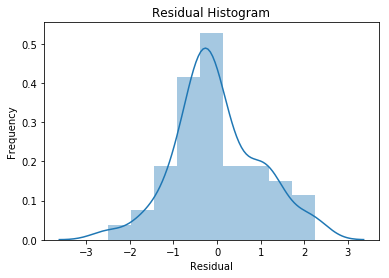

In [9]:
import statsmodels.api as sm
import seaborn as sns

ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-value: {}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results.t_test([1,0]))
print('Intercept:')
print(results.t_test([1,1]))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

**Your Turn:** Create a regression moodel from synthetic data with intercept of 0 and maximum value at ${x = 10, y = 10}$, and with a the error having a standard deviation of 5. Plot the result of your model. How does this slope and intercept of this model compare to the model from the data with a standard deviation of 1? **Hint:** You need need to add columns named `score` and `resids` to the data frame before you create the plots. 

In [18]:
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 5

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
reg_data_5 = pd.DataFrame({'x':x_data, 'y':y_data})

reg_data_5.head()

,x,y
0,0.000000,-1.882677
1,0.204082,4.038612
2,0.408163,0.955433
3,0.612245,6.580631
4,0.816327,-7.886612


Intercept, Slope : const   -0.857445
x        1.448362
dtype: float64
Intercept t-value, Slope t-value: const   -0.655977
x        6.429887
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.8574      1.307     -0.656      0.515      -3.486       1.771
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5909      1.119      0.528      0.600      -1.659       2.841

SSE, SST, SSR, and RMSE:
SSE: 1002.5086615877242
SST: 2058.7224193159614
SSR: 1056.2137577282372
RMSE: 30.161894929099397


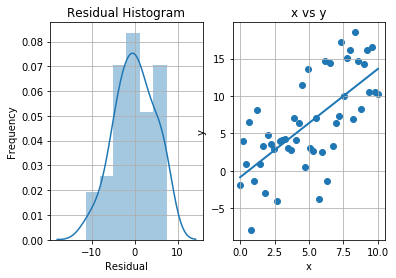

In [35]:
# Fit the model and get the linear model summaries/plots.
x5_input = reg_data_5['x']
y5_output = reg_data_5['y']
ols5_model = sm.OLS(y5_output, sm.add_constant(x5_input))

results5 = ols5_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results5.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-value: {}'.format(results5.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results5.t_test([1,0]))
print('Intercept:')
print(results5.t_test([1,1]))

print('\nSSE, SST, SSR, and RMSE:')
mean5_y = np.mean(y5_output)
sst5 = np.sum((y5_output - mean_y)**2)
sse5 = sst5 - results5.ssr
print('SSE: {}'.format(sse5))
print('SST: {}'.format(sst5))
print('SSR: {}'.format(results5.ssr))
print('RMSE: {}'.format(np.sqrt(results5.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results5.summary())

# Plot a histogram of the residuals
y5_pred = ols5_model.fit().predict(sm.add_constant(x5_input))

plt.subplot(1, 2, 1)
sns.distplot(results.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

plt.subplot(1, 2, 2)
plt.scatter(x5_input, y5_output)
plt.plot(x5_input, y5_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

### Evaluation of regression models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. The evaluation of regression models is based on measurements of the errors. The errors of a regression model can be visualized as shown in the figure below. 

<img src="img/Errors.jpg" alt="Regression_Errors" style="width: 450px;"/>

<center>**Measuring errors for a regression model**
$$Where\\
Y = [y_1, y_2, \ldots, y_n]\\
and\\
y_i = ith\ data\ value\\
\bar{Y} = mean(Y)\\
\\\hat{y_i} = regression\ estimate\ of\ y_i\\
SSE = sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR = sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST = sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2$$

The goal of regression is to minimize the residual error, $SSR$. Specifically we wish to explain the maximum amount of the variance in the original data as possible with our model. We can quantify this idea with coeficient of determination also known as $R^2$.

$$R^2 = 1 - \frac{SSR}{SST}\\
so\ as\\
SSR \rightarrow 0\\
R^2 \rightarrow 1$$

In words, $R^2$ is the fraction of the variance of the original data explained by the model. A model with perfectly explain the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$.

However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.
 
To addresses these related issues, we can use adjusted $R^2$.

$$R^2_{adj} = 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_SSR = SSR\ degrees\ of\ fredom\\
df_SST = SST\ degrees\ of\ fredom$$

This gives $R^2_{adj}$ as:

$$R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n = number\ of\ data\ samples\\
k = number\ of\ model\ coeficients$$

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$

Another measure of regression performance is root mean square error or $RMSE$:

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \frac{\sqrt{SSR}}{n}$$

**Your Turn:** Examine the performance metrics for the previous two regressions. How do SSE, SSR, SST, $R^2$, and RMSE compare?

## Scaling Data

When performing regression with numeric variables you will almost **always scale the data**.  Scaling data is important not just for regression, but most other machine learning models. Some reasons to scale regression data include:

- The intercept may be a long way from the actual data. With scaled features, the intercept is at the centroid of the distribution. 
- Scaling prevents features with a large numerical range from overwhelming featuures with small numerical values. Numerical range is not an indicator of feature importance!

There are several possibile approaches to scaling data:
 - Scale the features or independent variables. This is the most common practice.
 - Scale the label or dependent variable.
 - Scale both, which is another common practice
 
In this case, we will just scale the one feature. Execute the code in the cell below and examine the results. 

In [14]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

# Add scaled x to data frame
sim_data['x_scale'] = scale(sim_data['x'])

sim_data.head()

,x,y,predicted,resids,x_scale
0,0.000000,0.081076,-0.132854,0.213930,-1.697749
1,0.204082,-1.589542,0.077558,-1.667100,-1.628453
2,0.408163,1.278598,0.287970,0.990628,-1.559158
3,0.612245,-0.757524,0.498383,-1.255906,-1.489862
4,0.816327,1.601651,0.708795,0.892856,-1.420566


Notice that the new `x_scale` feature has some additional attributes. These attributes are used to scale new data on which you are making predicitons. This model **will not work on unscaled** data. 

Run the code in the cell below to create and evaluate a regression model using the scaled data. 

Scaled: Intercept, Slope : const      5.022245
x_scale    3.036431
dtype: float64
Scaled: Intercept t-value, Slope t-value: const      36.084691
x_scale    21.816673
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.0222      0.139     36.085      0.000       4.742       5.302
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             8.0587      0.197     40.942      0.000       7.663       8.454

Scaled: SSE, SST, SSR, and RMSE:
SSE: 460.9956865364682
SST: 507.4858487426783
SSR: 46.490162206

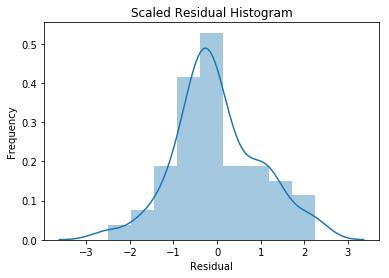

In [15]:
x_scaled = sim_data['x_scale']
ols_model = sm.OLS(y_output, sm.add_constant(x_scaled))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Scaled: Intercept t-value, Slope t-value: {}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results.t_test([1,0]))
print('Intercept:')
print(results.t_test([1,1]))

print('\nScaled: SSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Scaled Residual Histogram')

Examine these results and compare them to the results for the unscaled regression. Which performance statistics are the same and which are different?

**Your Turn:** In the cell below use the data you created earlier to compute and evaluate a regression model using a scaled feature. Which performance metrics are the same and which are different.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


SSE = 484.019565447488 
SSR = 1048.77817177209 
SST = 1532.79773721958 
RMSE = 10.0837409468227 
Adjusted R^2 = 0.286659287396418 
Intercept = 4.24066250855075 
Slope = 3.14292066639533 


Summary on R Model Object


Call:
lm(formula = y ~ x.scale, data = reg.data.5)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4117 -3.9323  0.3488  2.9774 10.8228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2407     0.6611   6.415 5.81e-08 ***
x.scale       3.1429     0.6678   4.707 2.17e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.674 on 48 degrees of freedom
Multiple R-squared:  0.3158,	Adjusted R-squared:  0.3015 
F-statistic: 22.15 on 1 and 48 DF,  p-value: 2.173e-05


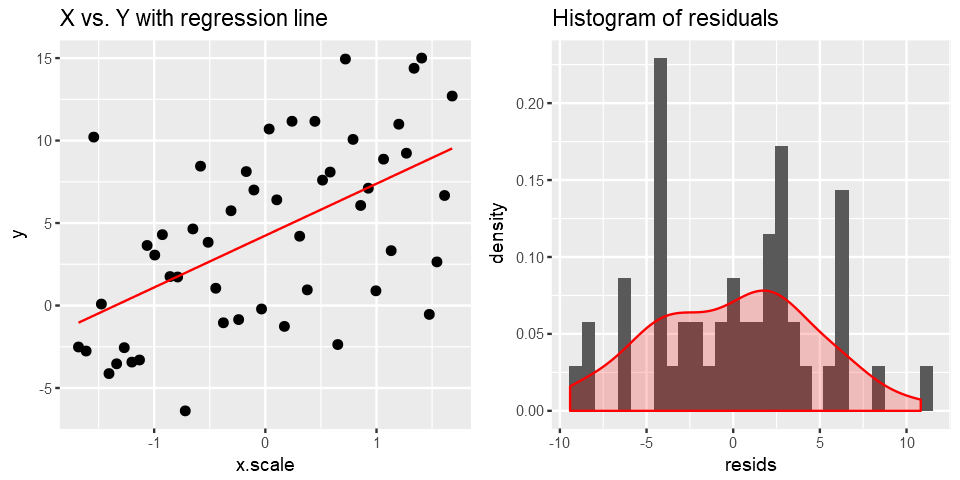

In [17]:
reg.data.5$x.scale = scale(reg.data.5$x)

mod.scale.5 = lm(y ~ x.scale, data = reg.data.5)
plot.regression(reg.data.5, x = 'x.scale', mod.scale.5)

## Linear regression assumptions

At this point we should discuss a few key assumtions of linear regression. Keep these points in mind whenever you used these models. 

- There is a **linear relationship** between dependent variable and the **coeficients** of the independent variables.
- Measurement error is independent and random. Technically, we say that the error is **independent identical distribution, or iid**.
- Errors arise from the dependent variable only.
- There is no multicolinearity. In other words, there is no significant correlation between the independent variables.
- Residuals are **homoscedastic** (constant variance).  In other words, the errors are the same across all groups of independent variables. The opposite of homoscedastic is **heteroscedastic**, where there is systematic variation in the residuals with label values.

The diagram below illustrates the iid errors for the dependent variable only.

![](img/IndependentErrors.jpg)

## Linear regressions are not just for strait lines

A linear model is linear in its coeficients, but that does not mean we are limited to straight lines, **a common misconception**.  In fact, a linear model need only be linear in its coeficients. A **non-comprehensive** list of functions which can be included in a linear model includes:

- Polynomials, but beware of polynomials of degree 3 or above.
- Splines and smoothing kernels.
- trigonometric functions.
- Logrithmic and expontential functions.
- Interaction terms, which are the product of feature values. For example, the two-way interaction of `var1` and `var2` is specified at `var1:var2`, or `var1*var2`. Adding a third variable, `var3` the three-way interaction, including all two-way interactions is modeled as `var1:var2:var3`. 

Clarify these concepts, let's look at an example. The code in the cell below computes a curved line using a second order polynomial with coeficients `c1 and c2` and adds Normally distributed noise.  Notice that the polynomial is defined by a linear sum of the components, defined by the coeficients. **Pay attention to the scaling of the features.** Run this code and have a look at the head of the data frame.

In [9]:
sim.data.ploy <- function(x1, y1, x2, y2, c1 = 1.0, c2 = 0.5, n, sd){
  require(dplyr)
  error <- rnorm(n, mean = 0, sd = sd)
  df = data.frame(
              x = seq(from = x1, to = x2, length.out = n),
              y = (seq(from = y1, to = y2, length.out = n))
            )
  df = df %>% mutate(y = c1 * y + c2 * y^2 + error)
  df$x = scale(df$x)
  df
}
reg.data.poly = sim.data.ploy(0, 0, 10, 10, n = 50, sd = 3)
head(reg.data.poly)

Loading required package: dplyr

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



x,y
-1.680686,-4.434601
-1.612087,-2.686913
-1.543487,3.912236
-1.474888,7.257378
-1.406288,-3.062095
-1.337689,-1.309863


Next, you will compute a linear polynomial model for these data. The code in the  cell below uses the `I()` function which literally **Interprets** the argument. In this case `I(x^2)` is interpreted as the second order polynomial term. Run this code and examine the results. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


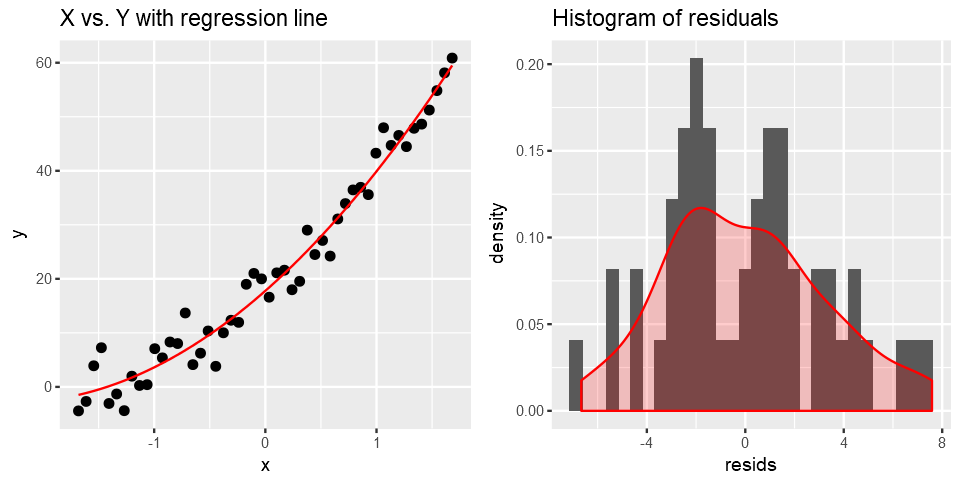

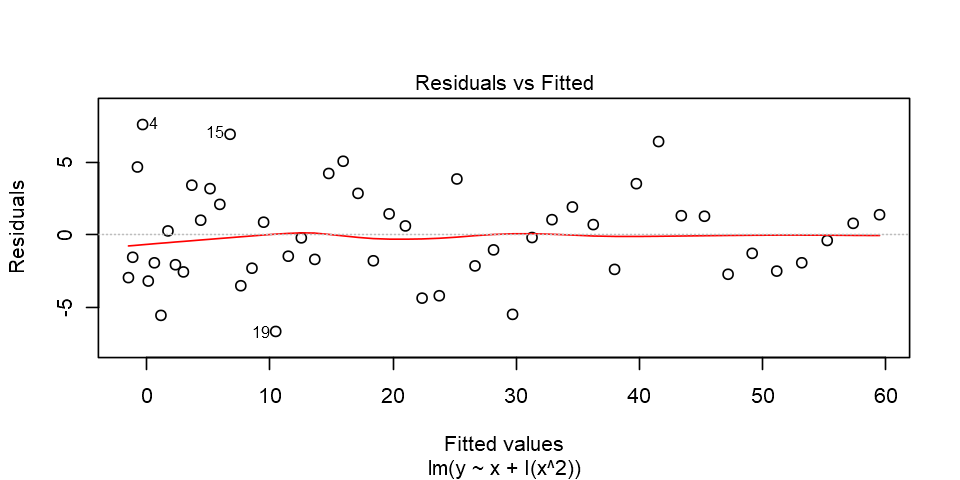

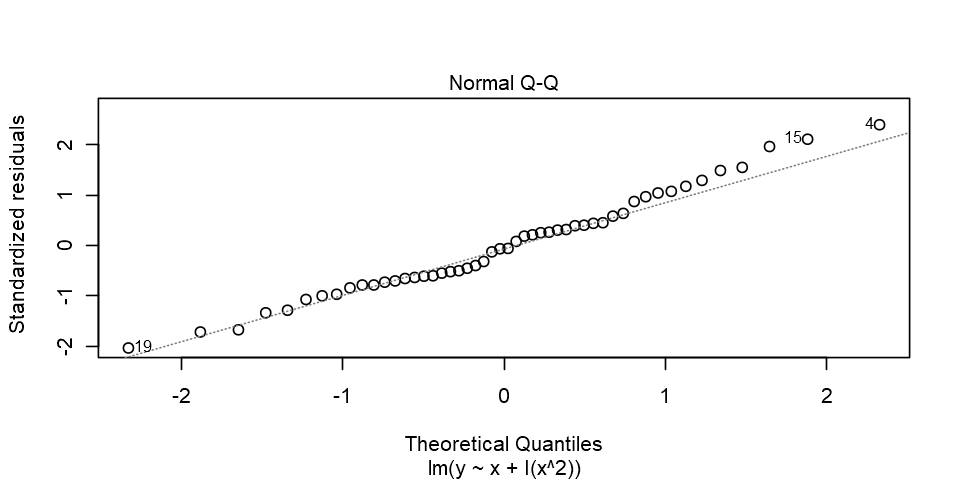

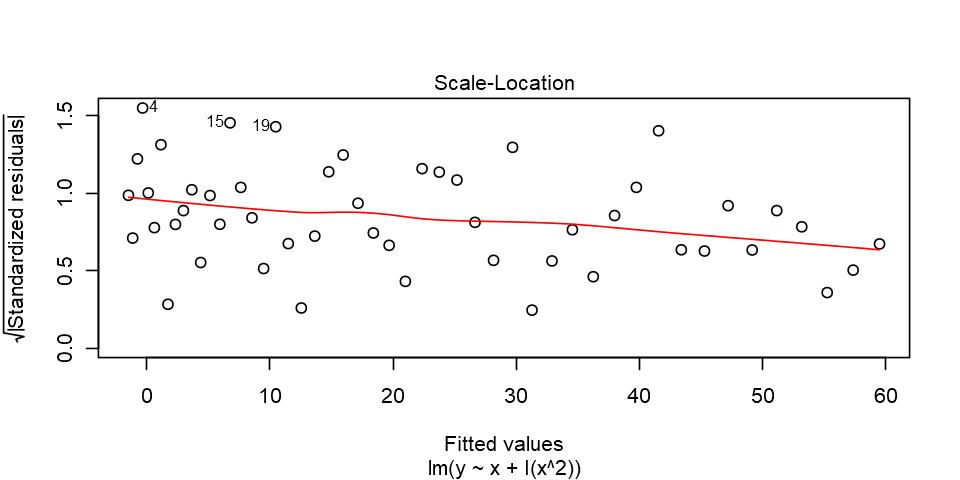

SSE = 16730.4104889038 
SSR = 522.801842938138 
SST = 17253.2123318419 
RMSE = 348.550218518829 
Adjusted R^2 = 0.967722091133378 
Intercept = 17.7765503290558 
Slope = 18.1398291212835 


Summary on R Model Object


Call:
lm(formula = y ~ x + I(x^2), data = reg.data.poly)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6631 -2.2692 -0.2066  1.7880  7.5845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.7766     0.7077  25.118  < 2e-16 ***
x            18.1398     0.4765  38.073  < 2e-16 ***
I(x^2)        3.9767     0.5384   7.386 2.13e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.335 on 47 degrees of freedom
Multiple R-squared:  0.9697,	Adjusted R-squared:  0.9684 
F-statistic:   752 on 2 and 47 DF,  p-value: < 2.2e-16


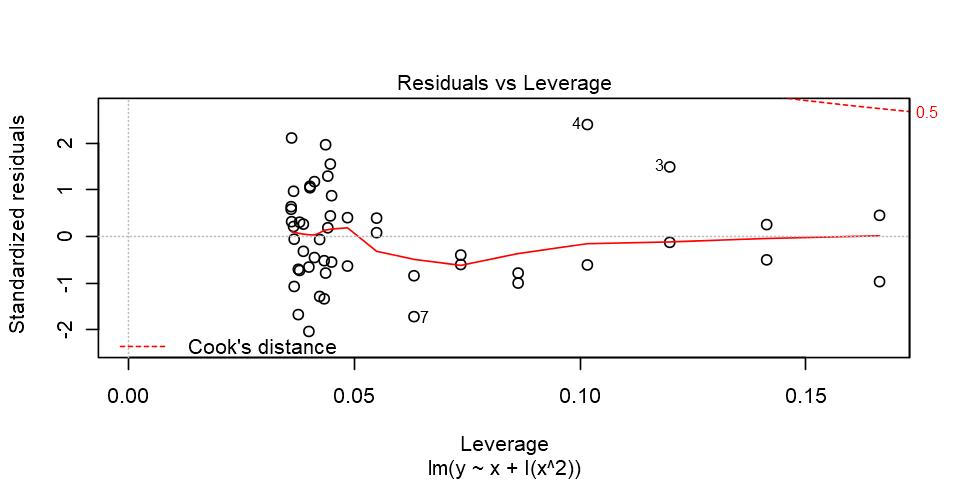

In [18]:
mod.poly = lm(y ~ x + I(x^2), reg.data.poly)
reg.data.poly$score <- predict(mod.poly, data = reg.data.poly)
reg.data.poly$resids <- reg.data.poly$y - reg.data.poly$score
plot.regression(reg.data.poly, mod.poly, k = 3)

There is quite a bit of new information both plotted and in the tables. Let's step through what all this means.

- The plot of the data and the regression line. Look at this plot and try to decide if the fit is reasonably good.
- The histogram of the residuals. Do these residuals appear to be close to Normally distributed?
- A plot of fitted values (y in this case) vs. the residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values. 
- A Q-Q Normal plot of the residuals. Do these residuals appear to be close to Normally distributed?
- A plot of fitted values vs. the square root of the standardized residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values and should be in the range $0 \le \sqrt{stdresid} \le 1.5$ standard deviations. 
- The statistics we have already discussed.
- The report from the R `summary` method.
  - The model formula.
  - Summary statistics of the residuals.
  - For each model coeficient, 1) the value of the coeficient, 2) the standard error of the coeficient, 3) the t statistic for the coeficient, and 4) the p-value of the coeficient. The null hypothesis for the coeficient is that it is 0, and not contributing to the model.
  - The standard error of the residuals, defined as:
$$rse = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{df} = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{N - k}\\
where\\
k = number\ of\ model\ parameters
$$
  - $R^2$ and $R^2_{adj}$.
  - The F statistic and p-value for the model. The null hypthesis is that the model is not explaining the data, or that the distribution of residuals is the same as the distribution of the original data. 
- A leverage plot showing cooks distance. More on this latter.

**Your Turn:** Compute a linear model using a straight line for the polynomial curve data. Compare the plots and the performance metrics. **Use a different model name and copy the dataframe to a new name so the notebook works correctly**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


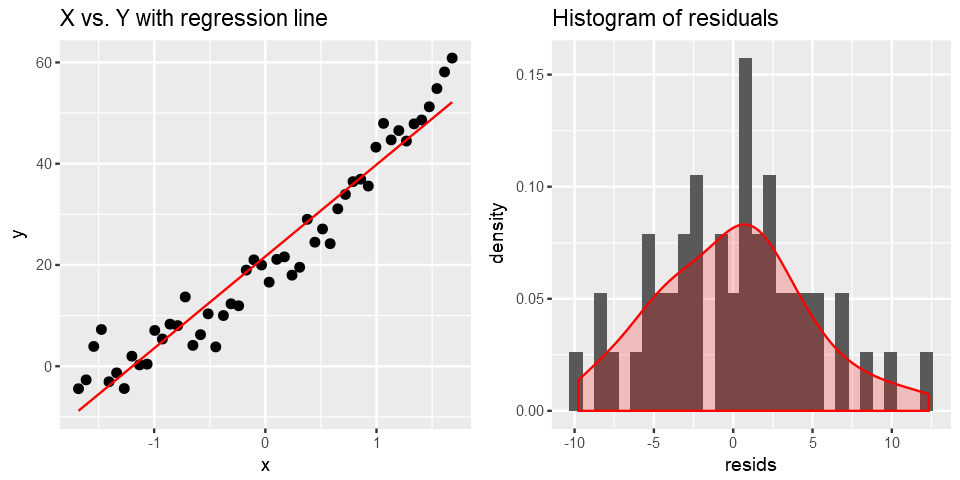

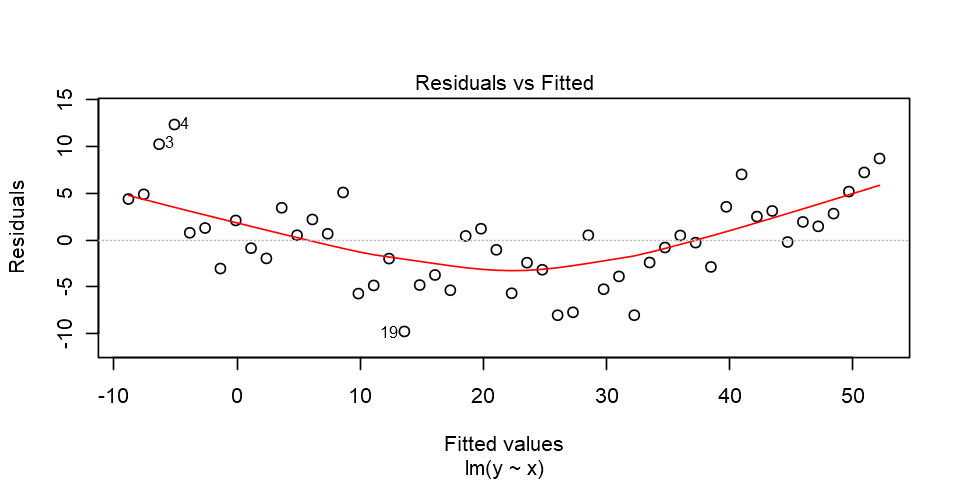

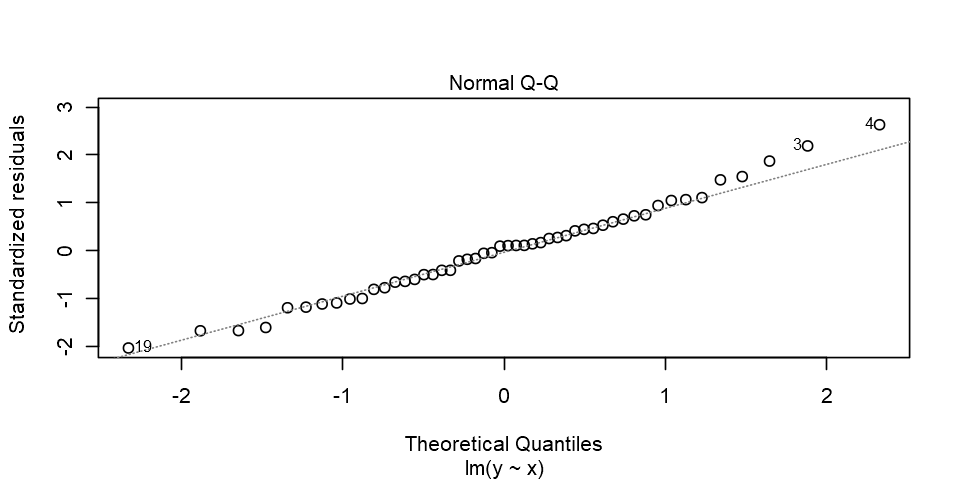

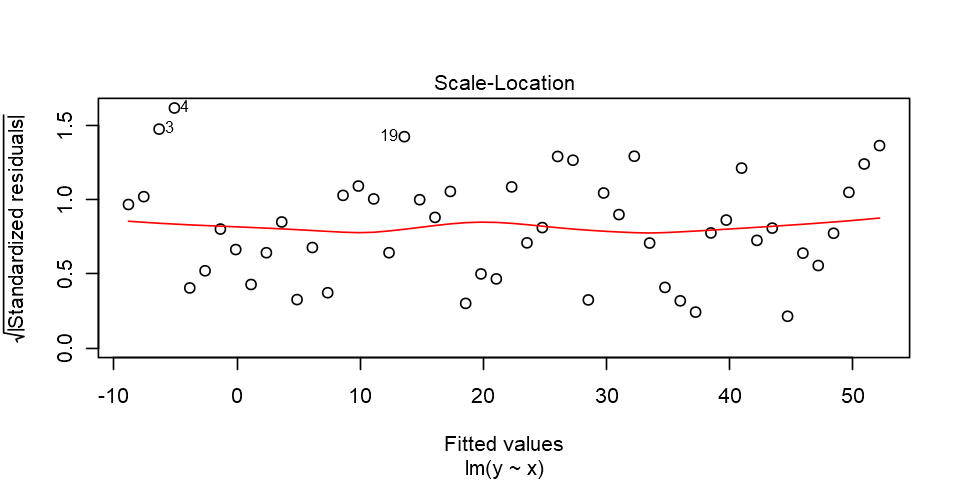

SSE = 16123.616626919 
SSR = 1129.59570492297 
SST = 17253.2123318419 
RMSE = 335.908679727478 
Adjusted R^2 = 0.930258495236511 
Intercept = 21.6737390001702 
Slope = 18.1398291212835 


Summary on R Model Object


Call:
lm(formula = y ~ x, data = reg.data.lin)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7697 -3.1455  0.4602  2.7408 12.3379 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.6737     0.6861   31.59   <2e-16 ***
x            18.1398     0.6930   26.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.851 on 48 degrees of freedom
Multiple R-squared:  0.9345,	Adjusted R-squared:  0.9332 
F-statistic: 685.1 on 1 and 48 DF,  p-value: < 2.2e-16


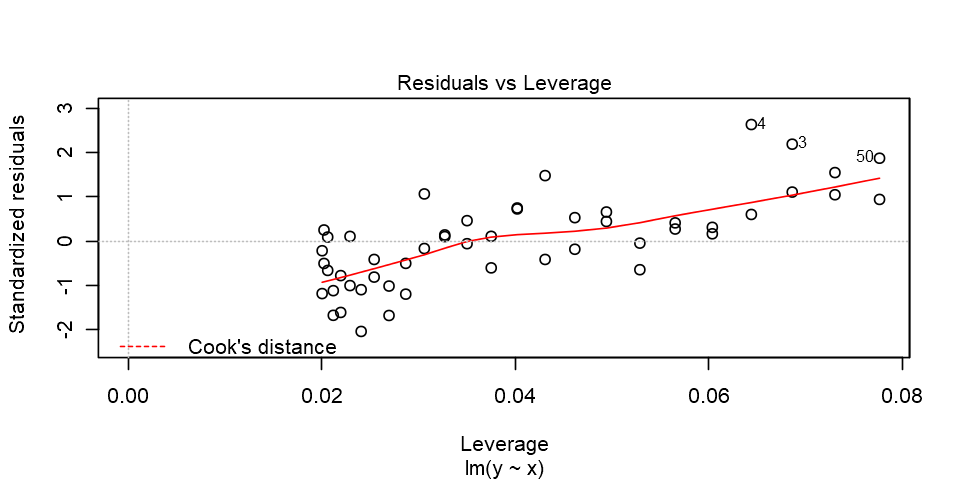

In [20]:
reg.data.lin = reg.data.poly[, c('x','y')]
mod.lin = lm(y ~ x, reg.data.lin)
reg.data.lin$score <- predict(mod.lin, data = reg.data.lin)
reg.data.lin$resids <- reg.data.lin$y - reg.data.lin$score
plot.regression(reg.data.lin, mod.lin, k = 3)

## Scaling Revisited

**Your Turn:** Now that you have worked with scaled and unscaled models and the various summary statistics try this exerice. Use the R `summary` function to compute model evaluations for the two (scaled and unscaled feature) straight line regression models you computed. Compare these results noticing the diffences. 

## Homoscedastic and Heteroscedastic Errors

Let's elaborate on some of the assumptions for the linear model. 

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = N(0, \sigma)$$

In this model the errors, $\epsilon_i$, do not depend on the dependent variable `y`. In this case we say the errors are **homoscedastic**.

But what if:

$$\epsilon_i = N(0, f(x_i))\\
such\ as\\
\epsilon_i = N(0, e^{x_i})$$

These errors are now **heteroscedastic**, with the errors dependent on `x` and hence not constant in `y`.

Let's look at an example. In the code below the error increases linerly as `x` increases. Run this code and examine the result.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


SSE = 251.484396219043 
SSR = 19049.8384789351 
SST = 19301.3228751542 
RMSE = 5.23925825456339 
Adjusted R^2 = -0.028969362982693 
Intercept = 2.72042404053358 
Slope = 0.761507341580869 


Summary on R Model Object


Call:
lm(formula = y ~ x, data = reg.data.het)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.598  -7.571  -0.961  10.452  50.041 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.7204     5.5512   0.490    0.626
x             0.7615     0.9566   0.796    0.430

Residual standard error: 19.92 on 48 degrees of freedom
Multiple R-squared:  0.01303,	Adjusted R-squared:  -0.007533 
F-statistic: 0.6337 on 1 and 48 DF,  p-value: 0.4299



Call:
lm(formula = y ~ x, data = reg.data.het)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.598  -7.571  -0.961  10.452  50.041 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.7204     5.5512   0.490    0.626
x             0.7615     0.9566   0.796    0.430

Residual standard error: 19.92 on 48 degrees of freedom
Multiple R-squared:  0.01303,	Adjusted R-squared:  -0.007533 
F-statistic: 0.6337 on 1 and 48 DF,  p-value: 0.4299


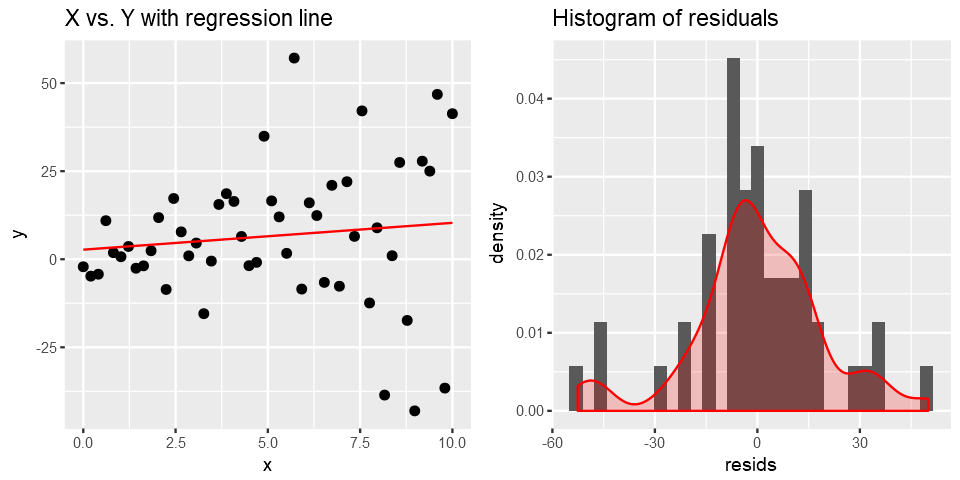

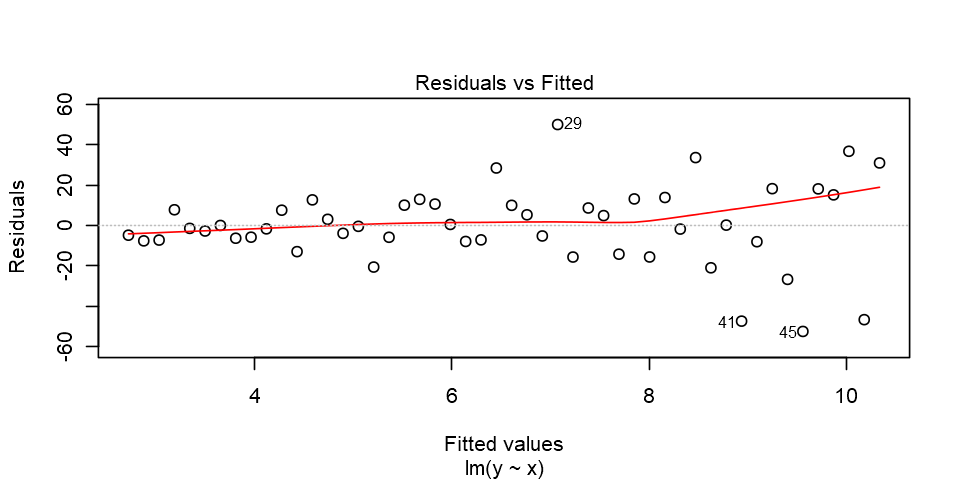

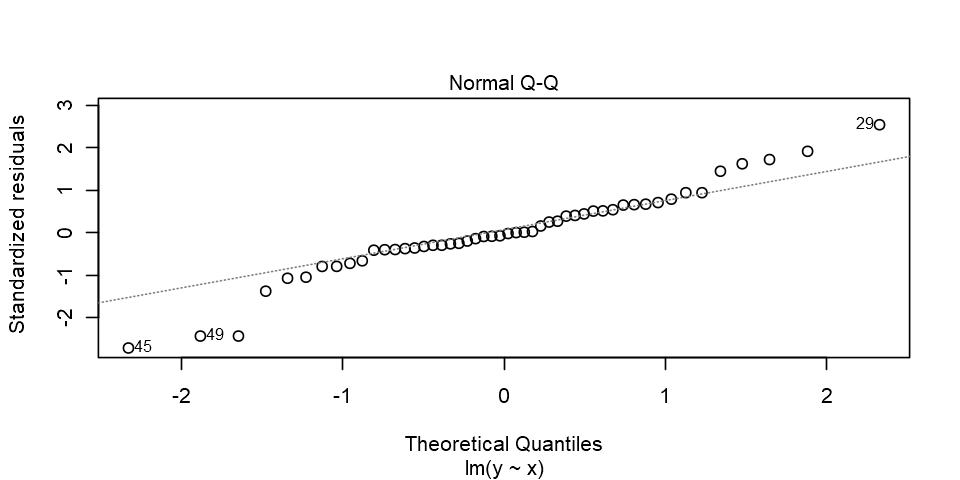

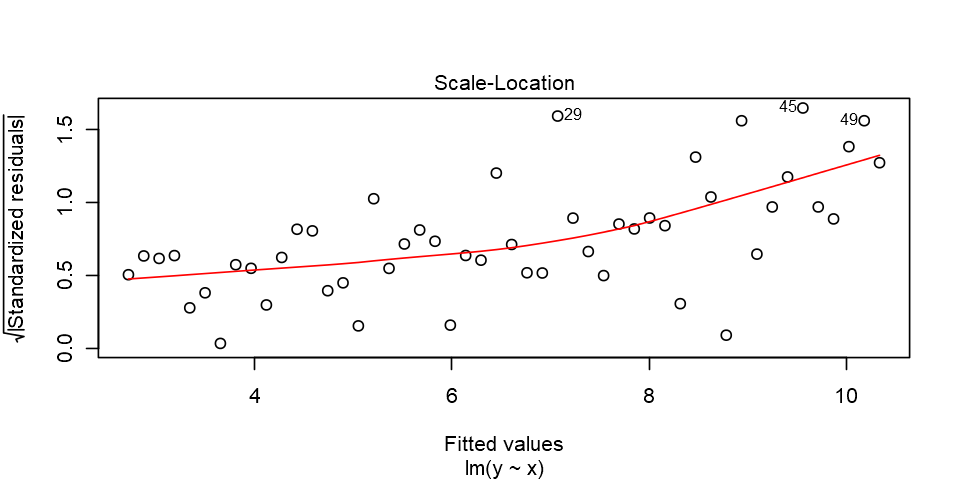

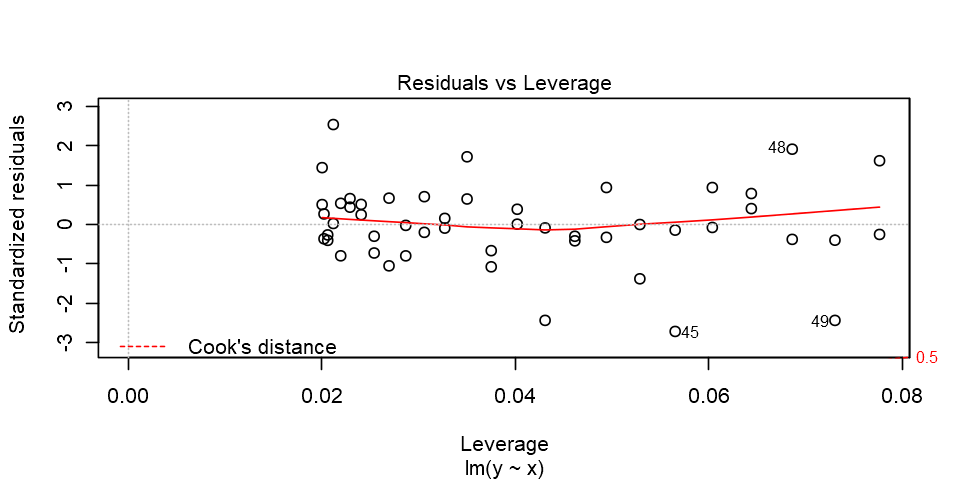

In [21]:
sim.data.het <- function(x1, y1, x2, y2, n, sd, factor = 10){
  require(dplyr)
  error <- rnorm(n, mean = 0, sd = sd)
  error = error * seq(1, factor, length.out = n)
  df = data.frame(
              x = seq(from = x1, to = x2, length.out = n),
              y = (seq(from = x1, to = x2, length.out = n))
            )
  df = df %>% mutate(y = y + error)
}
reg.data.het = sim.data.het(0, 0, 10, 10, n = 50, sd = 3)

mod.het = lm(y ~ x, data = reg.data.het)
reg.data.het = reg.data.het
reg.data.het$score <- predict(mod.het, data = reg.data.het)
reg.data.het$resids <- reg.data.het$y - reg.data.het$score
plot.regression(reg.data.het, mod.het, k = 2)
summary(mod.het)
plot(mod.het)

Notice the following about these results, which violate the homoscedastic error assumption:

- The plot of residuals vs. the predicted value shows a systematic increase from left to right.
- The Q-Q plot and the histogram show that the distribution of residuals has heavy tails and deviates from Normal.
- The square root of the standardized residuals shows and increase from right to left on the plot.

## Leverage and Cook's Distance

Up to now, we have only looked at regression models with Normally distributed noise or errors. But, in the real world there are errors and outliers in data. These errors and outliers can have greater or lesser effect, depending on how extreem they are and their placement with respect to the other data. 

You can imagine a regression line as a lever. Outliers that occur near the ends of the lever will have a greater influence all other factors being equal. 

One way to measure influence of a data point is Cook's distance, introduced by Dennis Cook in 1977. The influence for the `ith` data point can be computed as:

$$D_i = \frac{\Sigma_{j=1}^n (\hat{Y_j} - \hat{Y_{j(i)}})^2}{n (p+1)\hat{\sigma^2}} \\
where \\
p = number\ of\ parameters\\
n = number\ of\ data\ points$$

In effect, cooks distance compares the difference between means with and without a given data point. Computing Cook's distance can be moderately computationally intensive for large data set. Typically, Cook's distance is measured in units of standard deviation.

Let's make these concepts concrete with an example. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


SSE = 324.644542008078 
SSR = 450.462782604843 
SST = 775.10732461292 
RMSE = 6.62539881649138 
Adjusted R^2 = 0.394623105325825 
Intercept = 5.26795006018633 
Slope = 2.54811515441543 


Summary on R Model Object


Call:
lm(formula = y ~ x, data = error.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9536 -1.3594 -0.3358  0.6748 18.8583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2680     0.4246  12.408  < 2e-16 ***
x             2.5481     0.4288   5.943 2.87e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.032 on 49 degrees of freedom
Multiple R-squared:  0.4188,	Adjusted R-squared:  0.407 
F-statistic: 35.31 on 1 and 49 DF,  p-value: 2.869e-07



Call:
lm(formula = y ~ x, data = error.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9536 -1.3594 -0.3358  0.6748 18.8583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2680     0.4246  12.408  < 2e-16 ***
x             2.5481     0.4288   5.943 2.87e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.032 on 49 degrees of freedom
Multiple R-squared:  0.4188,	Adjusted R-squared:  0.407 
F-statistic: 35.31 on 1 and 49 DF,  p-value: 2.869e-07


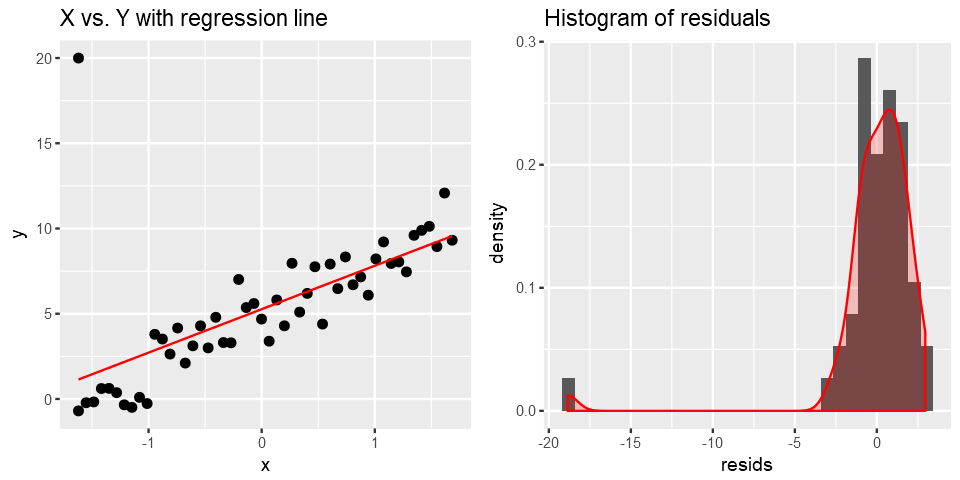

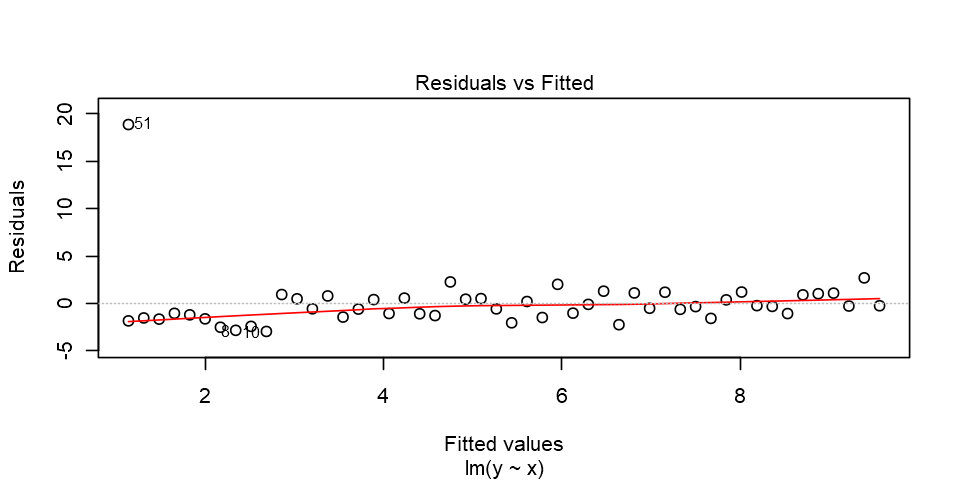

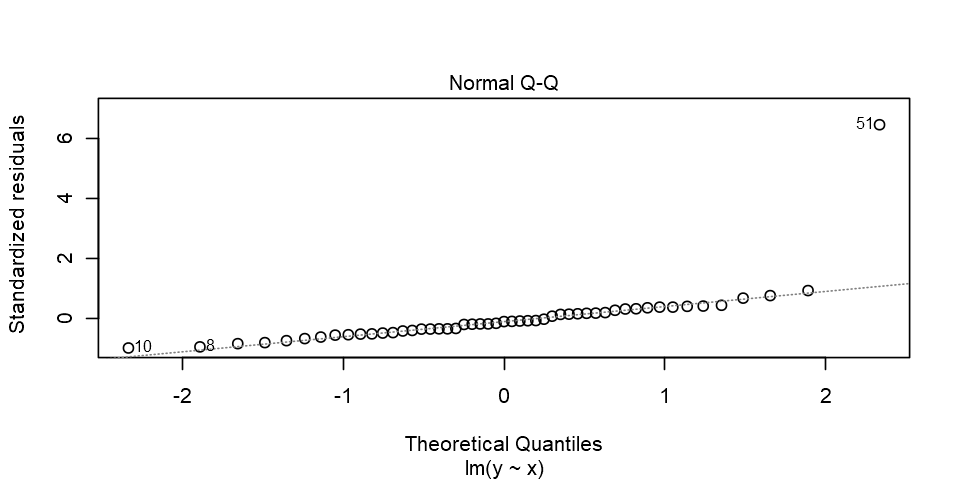

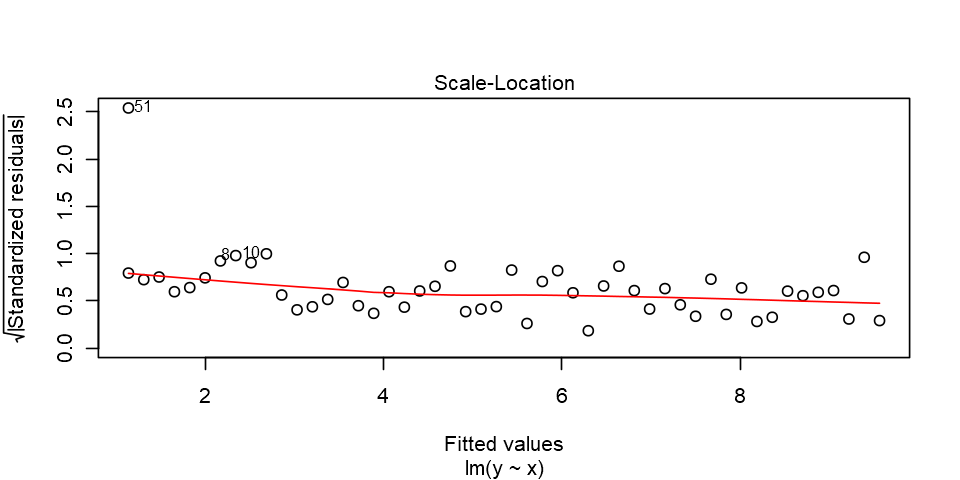

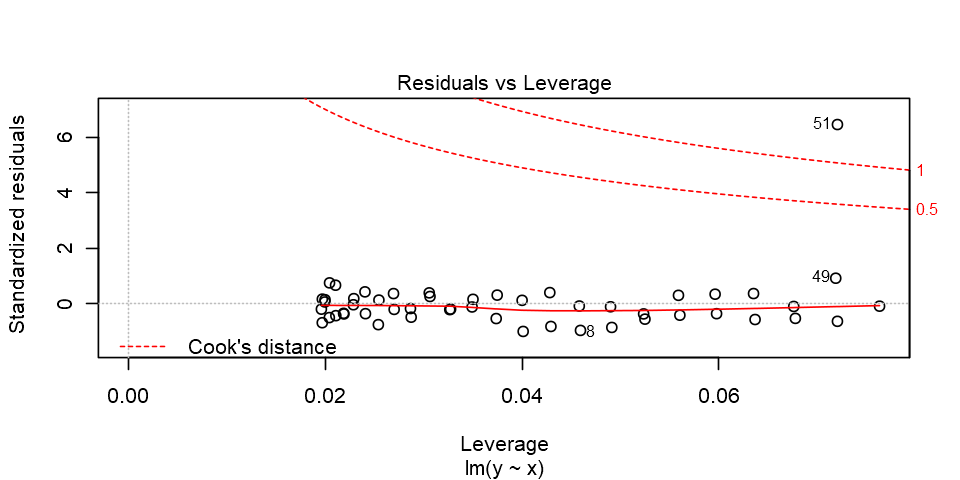

In [22]:
error.data = rbind(reg.data[, c('x', 'y')], c(0.0, 20.0))
error.data$x = scale(error.data$x)
mod.error = lm(y ~ x, data = error.data)
error.data$score = predict(mod.error, error.data)
error.data$resids = error.data$score - error.data$y
plot.regression(error.data, mod.error, k = 2)
summary(mod.error)
plot(mod.error)

Notice the outlier which is quite noticeable in several plots. The Cook's distance for this outlier is more than 1.0 standard deviations. 

**Your Turn:** Repeat the previous regression model caluculation and evaluation, but place the outlier at `(5.0, 20)`. How does this change the effect of the outlier?

## Bootstrapping regression

The bootstrap method can be applied to regresson models. Bootstraping a regression model gives insight on how variable the model parameters are. It is useful to know how much random variation there is in regression coeficients simply because of small changes in data values. 

As with most statistics, it is possible to bootstrap most any regression model. However, since bootstrap resampling uses a large number of subsamples, it can be computationally intensive. For large-scale problems it is necessary to using other resampling methods like cross-validation.

The code in the cell below computes 10,000 regression models using bootstrapped data samples. Run this code and examine the results

Loading required package: simpleboot
Loading required package: boot
Simple Bootstrap Routines (1.1-3 2008-04-30)


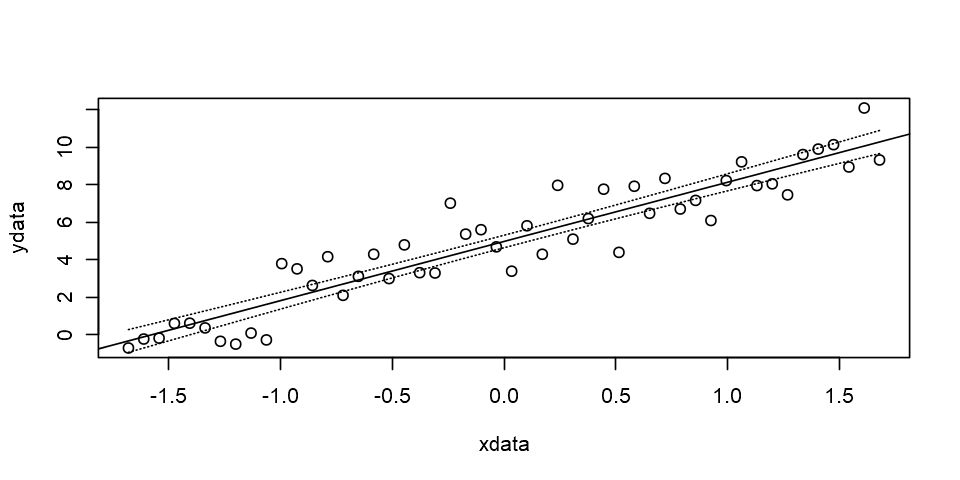

In [23]:
## Bootstrap and plot the linear model
require(simpleboot)
reg.data.2 = reg.data
# Scale, but loose the scaling attributes as they break lm.boot
reg.data.2$x = scale(reg.data$x)[1:nrow(reg.data)]  
mod.3 = lm(y ~ x, data = reg.data.2)
mod.boot = lm.boot(mod.3, R = 10000)
plot(mod.boot)

Notice the bootstrap confidence intervals around the regression line in the plot above.

You can also evaluate the confidence intervals around the bootstraped values of the model coeficients. Run the code in the cell below to do just this.

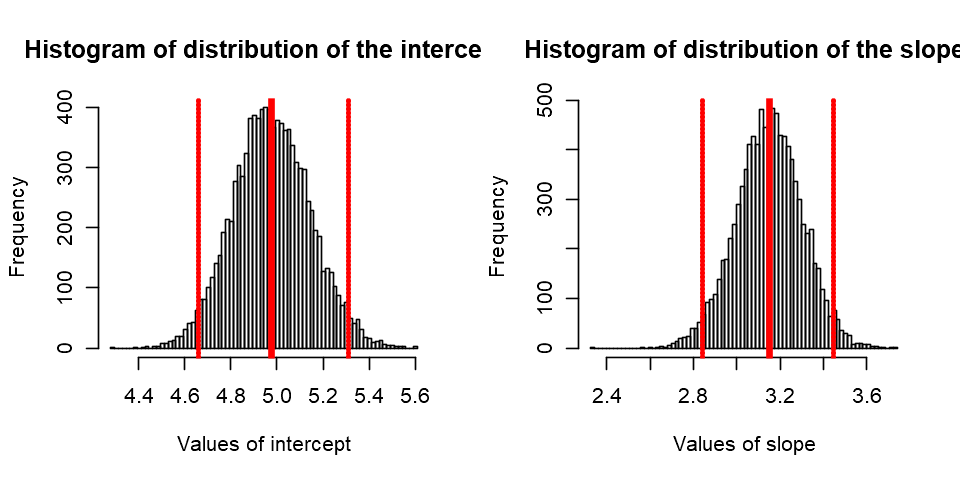

In [24]:
## Plot the histogram of the bootstrapped coeficents
plot.dist <- function(a, name = 'Intercept', nbins = 80, p = 0.05){
  maxs = max(a)
  mins = min(a)
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, 
       main = paste('Histogram of distribution of the', name), 
       xlab = paste('Values of', name))
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}

## View distribution of model coeficients
intercept = sapply(1:length(mod.boot$boot.list),
                   function(x) mod.boot$boot.list[[x]]$coef[1])
slope = sapply(1:length(mod.boot$boot.list),
               function(x) mod.boot$boot.list[[x]]$coef[2])
par(mfrow = c(1,2))
plot.dist(intercept, name = 'intercept')
plot.dist(slope, name = 'slope')
par(mfrow = c(1,1))

Notice that the 95% confidence interval for these model coeficients are in a fairly narrow range. 

**Your Turn:** Create and evaluate a bootstrap resampled version of one of the regression models you have created. **Hint**, make sure you feature does not have the scaling attribute or `lm.boot` will not work. 

#### Copyright 2017, Stephen F Elston. All rights reserved.